In [1]:
################################
# Description: N-Body gravitation simulation using RK4 or constant
# acceleration kinematics for integrator. Includes initial data
# for simulation of solar system. Intended for use in class; code
# needs to have gravitational potential energy and "force per mass"
# calculations added.
# 
# Author: Kyle Slinker, kyle.slinker@ncssm.edu
# Date: Nov 18 2019
################################



#bring in numerical functions and plotting utilities
import numpy as np
import matplotlib.pyplot as plt


#choose time step (years)
dt=0.0002

#choose maximum time (years)
tmax=0.2

#choose objects to include in simulation
#objects = np.array(["Sun","Jupiter","Io","Europa","Ganymede","Callisto"])
#objects = np.array(["Sun","Earth","Moon"])
#objects = np.array(["Sun","Mercury","Venus","Earth","Moon","Mars","Jupiter","Io","Europa","Ganymede","Callisto","Saturn","Titan","Uranus","Titania","Neptune","Triton","Pluto"])
objects = np.array(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune"])


#physical data
#note: units used are solar masses, astronomical units, and years (for mass, length, and time, respectively)

#value for the gravitational constant ("big G")
newtong=4*np.pi*np.pi

#initialize initial data arrays with a test particle
masses={"Test":0}
initial_positions={"Test":np.array([0,0,0])}
initial_velocities={"Test":np.array([0,0,0])}

#initial data for solar system bodies taken from NASA horizons system
# https://ssd.jpl.nasa.gov/horizons.cgi
#data approximately accurate for Jan 1 2015

#sun
masses["Sun"]=1.
initial_positions["Sun"]=np.array([0.002841029214124732, -0.0008551488389783957, -0.0001372196345812671])
initial_velocities["Sun"]=np.array([0.0014517459331591757, 0.0019127667619509917, -0.00003558156592386544])

#mercury
masses["Mercury"]=1.6605114093527725e-7
initial_positions["Mercury"]=np.array([0.3401540875319301, -0.2044550792740463, -0.04772012105321857])
initial_velocities["Mercury"]=np.array([3.295098788849848, 9.27046892555275, 0.455104500665124])

#venus
masses["Venus"]=2.4482737118213123e-6
initial_positions["Venus"]=np.array([0.5524983482189795, -0.4769264575796522, -0.03838223296316453])
initial_velocities["Venus"]=np.array([4.790798771054993, 5.558117083752716, -0.20027327679393173])

#earth
masses["Earth"]=3.0032978903157284e-6
initial_positions["Earth"]=np.array([-0.1683241372257412, 0.9674441923084423, -0.0001669835242727353])
initial_velocities["Earth"]=np.array([-6.286655246153797, -1.1172316463310714, 0.00021062429903807693])

#moon
masses["Moon"]=3.695668790833896e-8
initial_positions["Moon"]=np.array([-0.1666917632267577, 0.9694171153182533, -0.0002967360187374639])
initial_velocities["Moon"]=np.array([-6.447868549661463, -0.9740864886254743, -0.015661211332998387])

#mars
masses["Mars"]=3.227738486048083e-7 
initial_positions["Mars"]=np.array([1.358690797965978, -0.2758171771328441, -0.03917699408597988])
initial_velocities["Mars"]=np.array([1.213626696037594, 5.448103746420332, 0.08432659972159728])
    
#jupiter
masses["Jupiter"]=0.0009545325625181036
initial_positions["Jupiter"]=np.array([-3.726726780726139, 3.793259959947861, 0.06756053344765718])
initial_velocities["Jupiter"]=np.array([-1.9988348282920987, -1.8015292917432943, 0.05222310605123355])

#io
masses["Io"]=4.4922315020437053e-8
initial_positions["Io"]=np.array([-3.726623149674869, 3.790452913264995, 0.06746145569624462])
initial_velocities["Io"]=np.array([1.6662061488538618, -1.6577524621447548, 0.11300122914595484])

#europa
masses["Europa"]=2.4123177561069804e-8
initial_positions["Europa"]=np.array([-3.728521154868337, 3.797327406080249, 0.06771527850555936])
initial_velocities["Europa"]=np.array([-4.669295623887135, -2.9868191254830276, -0.0370593802735904])

#ganymede
masses["Ganymede"]=7.452689002606932e-8
initial_positions["Ganymede"]=np.array([-3.730848454290658, 3.799128385345571, 0.0677278642557369])
initial_velocities["Ganymede"]=np.array([-3.8725913361374302, -3.114743457052416, -0.021790306489574206])

#callisto
masses["Callisto"]=5.410994174632293e-8
initial_positions["Callisto"]=np.array([-3.739377815720888, 3.794060793835231, 0.06741518811621208])
initial_velocities["Callisto"]=np.array([-2.108242370504691, -3.5153427132952717, -0.003843947258376389])

#saturn
masses["Saturn"]=0.00028579654259598984
initial_positions["Saturn"]=np.array([-5.405313185445199, -8.35009362433022, 0.3603093935541996])
initial_velocities["Saturn"]=np.array([1.5991193382631028, -1.1132246500594873, -0.04415946059978823])

#titan
masses["Titan"]=6.766407984937723e-8
initial_positions["Titan"]=np.array([-5.39762889430962, -8.352053810436459, 0.3605594497083094])
initial_velocities["Titan"]=np.array([1.8833052840003635, -0.07994252793326738, -0.6050844486800765])

#uranus
masses["Uranus"]=0.000043655207025844026
initial_positions["Uranus"]=np.array([19.30657051495468, 5.250507992762163, -0.2306220390711898])
initial_velocities["Uranus"]=np.array([-0.38747419840467834, 1.319223994379516, 0.009880609592419919])

#titania
masses["Titania"]=1.7736595217405296e-9
initial_positions["Titania"]=np.array([19.30392391861676, 5.251230012752086, -0.2296147951519253])
initial_velocities["Titania"]=np.array([-0.10657334433571566, 1.357424284730423, 0.7227184002080426])

#neptune
masses["Neptune"]=0.000051499991953912005
initial_positions["Neptune"]=np.array([27.52968718187136, -11.8437607152196, -0.3905499561179334])
initial_velocities["Neptune"]=np.array([0.44535307067601226, 1.0600510514055674, -0.03195977856218761])

#triton
masses["Triton"]=1.0796844324289529e-8
initial_positions["Triton"]=np.array([27.53095143975824, -11.84190119599791, -0.3897966742916483])
initial_velocities["Triton"]=np.array([1.0818669367107043, 0.8910242341819735, -0.6829708057115563])

#pluto
masses["Pluto"]=6.572648128479932e-9
initial_positions["Pluto"]=np.array([7.400602906905451, -31.91988616953689, 1.274938896927729])
initial_velocities["Pluto"]=np.array([1.1409655398248801, 0.02884460735553121, -0.32892613858085307])


#gather a few pieces of information based on choosen parameters
nmax=objects.size
dt2=dt*dt
m=np.zeros(nmax)
x=np.zeros((nmax,3,1))
v=np.zeros((nmax,3,1))
for i in range(0,nmax):
    m[i]=masses[objects[i]]
    x[i,:,0]=initial_positions[objects[i]]
    v[i,:,0]=initial_velocities[objects[i]]
    
    
#description of function get_potential:
# - find the gravitational binding energy between object 1 and object 2;
#   return zero if the objects are the same object
#inputs:
# - positions of object 1 and object 2; p1 and p2; each a 3x1 numpy array
# - the masses of object 1 and object 2; m1 and m2; each a single number
# - Newton's gravitation constant; g; single number
#output:
# - gravitational potential energy between object 1 and object 2; single number

def get_potential(p1,p2,m1,m2,g):
    if np.array_equal(p1,p2):
        return 0
    else:
        ################################
        #Write your code between here...
        
        
        
        
        
        return 
        #...and here.
        ################################

#description of function get_acceleration:
# - find the acceleration of object 1 caused by object 2;
#   return zero if the objects are the same object
#inputs:
# - positions of object 1 and object 2; p1 and p2; each a 3x1 numpy array
# - the mass of object 2; m2; single number
# - Newton's gravitation constant; g; single number
#output:
# - the acceleration of object 1; 3x1 numpy array

def get_acceleration(p1,p2,m2,g):
    if np.array_equal(p1,p2):
        return np.array([0,0,0])
    else:
        ################################
        #Write your code between here...
        
        
        
        
        
        return 
        #...and here.
        ################################


#take a step using DVATs
def first_order_step(x,v,m,nmax,newtong,saveq):
    a=np.zeros((nmax,3))
    for i in range(0,nmax):
        for j in range(0,nmax):
            a[i]+=get_acceleration(x[i,:,-1],x[j,:,-1],m[j],newtong)
    
    if saveq:
        x=np.append(x,np.zeros((nmax,3,1)),axis=2)
        v=np.append(v,np.zeros((nmax,3,1)),axis=2)
        x[:,:,-1]=x[:,:,-2]+v[:,:,-2]*dt+0.5*a*dt2
        v[:,:,-1]=v[:,:,-2]+a*dt
    else:
        x[:,:,-1]+=v[:,:,-1]*dt+0.5*a*dt2
        v[:,:,-1]+=a*dt
        
    return x,v


#take a step using classic Runge-Kutta
def fourth_order_step(x,v,m,nmax,newtong,saveq):
    k1=np.zeros((nmax,3))
    k2=np.zeros((nmax,3))
    k3=np.zeros((nmax,3))
    k4=np.zeros((nmax,3))
    l1=np.zeros((nmax,3))
    l2=np.zeros((nmax,3))
    l3=np.zeros((nmax,3))
    l4=np.zeros((nmax,3))
    
    a=np.zeros((nmax,3))
    for i in range(0,nmax):
        for j in range(0,nmax):
            a[i]+=get_acceleration(x[i,:,-1],x[j,:,-1],m[j],newtong)
    
    k1=dt*v[:,:,-1]
    l1=dt*a
    
    a=np.zeros((nmax,3))
    for i in range(0,nmax):
        for j in range(0,nmax):
            a[i]+=get_acceleration(x[i,:,-1]+k1[i]/2.0,x[j,:,-1]+k1[j]/2.0,m[j],newtong)
        
    k2=dt*(v[:,:,-1]+l1/2.0)
    l2=dt*a
    
    a=np.zeros((nmax,3))
    for i in range(0,nmax):
        for j in range(0,nmax):
            a[i]+=get_acceleration(x[i,:,-1]+k2[i]/2.0,x[j,:,-1]+k2[j]/2.0,m[j],newtong)
        
    k3=dt*(v[:,:,-1]+l2/2.0)
    l3=dt*a
    
    a=np.zeros((nmax,3))
    for i in range(0,nmax):
        for j in range(0,nmax):
            a[i]+=get_acceleration(x[i,:,-1]+k3[i],x[j,:,-1]+k3[j],m[j],newtong)
        
    k4=dt*(v[:,:,-1]+l3)
    l4=dt*a
    
    if saveq:
        x=np.append(x,np.zeros((nmax,3,1)),axis=2)
        v=np.append(v,np.zeros((nmax,3,1)),axis=2)
        x[:,:,-1]=x[:,:,-2]+(k1+2.0*k2+2.0*k3+k4)/6.0
        v[:,:,-1]=v[:,:,-2]+(l1+2.0*l2+2.0*l3+l4)/6.0
    else:
        x[:,:,-1]+=(k1+2.0*k2+2.0*k3+k4)/6.0
        v[:,:,-1]+=(l1+2.0*l2+2.0*l3+l4)/6.0
        
    return x,v


#evolve the system; this is the part where the simulation is actually carried out
for t in range(0,(int)(tmax/dt)):
    x,v=first_order_step(x,v,m,nmax,newtong,t%10==0)

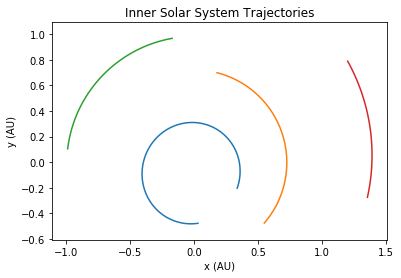

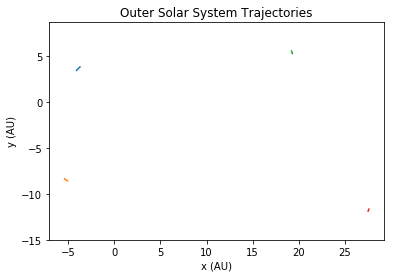

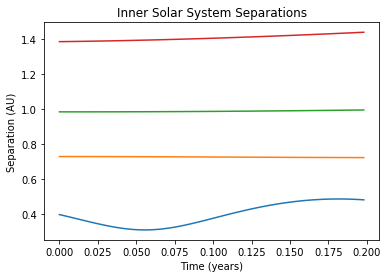

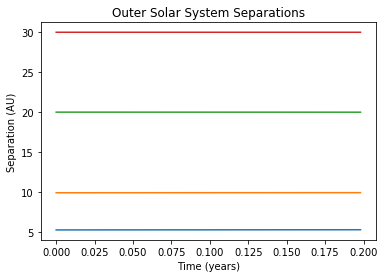

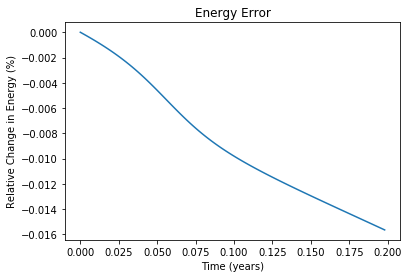

In [2]:
f=plt.figure()
plt.axes().set_aspect('equal','datalim')
plt.plot(x[1,0]-x[0,0],x[1,1]-x[0,1])
plt.plot(x[2,0]-x[0,0],x[2,1]-x[0,1])
plt.plot(x[3,0]-x[0,0],x[3,1]-x[0,1])
plt.plot(x[4,0]-x[0,0],x[4,1]-x[0,1])
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Inner Solar System Trajectories")
plt.show()
f.savefig("inner_solar_system_trajectories.png",bbox_inches='tight')

f=plt.figure()
plt.axes().set_aspect('equal','datalim')
plt.plot(x[5,0]-x[0,0],x[5,1]-x[0,1])
plt.plot(x[6,0]-x[0,0],x[6,1]-x[0,1])
plt.plot(x[7,0]-x[0,0],x[7,1]-x[0,1])
plt.plot(x[8,0]-x[0,0],x[8,1]-x[0,1])
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.title("Outer Solar System Trajectories")
plt.show()
f.savefig("outer_solar_system_trajectories.png",bbox_inches='tight')



f=plt.figure()
sep=np.sqrt(np.sum((x[1]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
sep=np.sqrt(np.sum((x[2]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
sep=np.sqrt(np.sum((x[3]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
sep=np.sqrt(np.sum((x[4]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
plt.xlabel("Time (years)")
plt.ylabel("Separation (AU)")
plt.title("Inner Solar System Separations")
plt.show()
f.savefig("inner_solar_system_separations.png",bbox_inches='tight')

f=plt.figure()
sep=np.sqrt(np.sum((x[5]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
sep=np.sqrt(np.sum((x[6]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
sep=np.sqrt(np.sum((x[7]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
sep=np.sqrt(np.sum((x[8]-x[0])**2,axis=0))
plt.plot((tmax/sep.size)*np.array(range(0,sep.size)),sep)
plt.xlabel("Time (years)")
plt.ylabel("Separation (AU)")
plt.title("Outer Solar System Separations")
plt.show()
f.savefig("Outer_solar_system_separations.png",bbox_inches='tight')






energy=np.zeros(x.shape[-1])
for t in range(0,x.shape[-1]):
    energy[t]=0
    for i in range(0,nmax):
        energy[t]+=0.5*m[i]*np.sum((v[i,:,t])**2)
        for j in range(0,nmax):
            energy[t]+=0.5*get_potential(x[i,:,t],x[j,:,t],m[i],m[j],newtong)

energy/=energy[0]
energy-=1
energy*=100

f=plt.figure()
plt.plot((tmax/energy.size)*(np.array(range(0,energy.size))),energy)
plt.xlabel("Time (years)")
plt.ylabel("Relative Change in Energy (%)")
plt.title("Energy Error")
plt.show()
f.savefig("energy_error.png",bbox_inches='tight')